In [1]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Documents/Programming/Data Science/Hackathon/train set.csv")

In [3]:
train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [4]:
test  = pd.read_csv("Documents/Programming/Data Science/Hackathon/test set.csv")

In [5]:
test.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
1,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


In [6]:
names = [x.split(' ')[0] for x in list(train['name'])]

In [7]:
train.insert(0,'brand',names)

In [8]:
train= train.drop(['name','seller_type','owner','torque','fuel'],axis=1)

In [9]:
train['engine'] = [int(x.split(' ')[0]) for x in list(train['engine'])];

In [10]:
train['mileage'] = [float(x.split(' ')[0]) for x in list(train['mileage'])]
train['max_power'] = [float(x.split(' ')[0]) for x in list(train['max_power'])]

In [11]:
train.head(2)

,brand,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Manual,23.40,1248,74.00,5.0
1,Skoda,2014,370000,120000,Manual,21.14,1498,103.52,5.0


In [12]:
num_features = [x for x in train.columns if type(train[x][0]) is not str]
cat_features = [x for x in train.columns if x not in num_features]

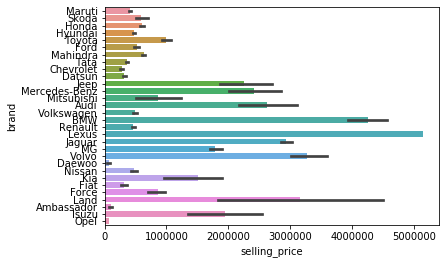

In [13]:
import seaborn as sns, matplotlib.pyplot as plt

sns.barplot(y=train['brand'], x=train['selling_price'])
plt.show()

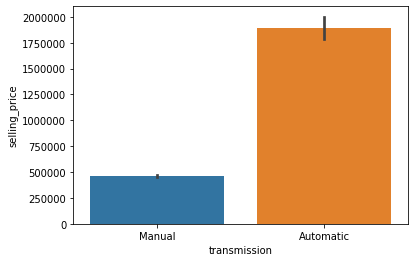

In [14]:
import seaborn as sns, matplotlib.pyplot as plt

sns.barplot(x=train['transmission'], y=train['selling_price'])
plt.show()

In [15]:
train['transmission'] = [0 if x == 'Manual' else 1 for x in train['transmission']]

In [16]:
train.head(3)

,brand,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,23.40,1248,74.00,5.0
1,Skoda,2014,370000,120000,0,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,0,17.70,1497,78.00,5.0


In [17]:
train['brand'] = [0 if x <= 1000000 else 1 if x <= 2000000 else 2 if x <= 4000000 else 3 for x in train['selling_price'] ]

In [18]:
train.head(3)

,brand,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats
0,0,2014,450000,145500,0,23.40,1248,74.00,5.0
1,0,2014,370000,120000,0,21.14,1498,103.52,5.0
2,0,2006,158000,140000,0,17.70,1497,78.00,5.0


In [19]:
X_train = train.drop('selling_price', axis=1).values[0:6850]
y_train = train['selling_price'].values[0:6850]

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train) 

In [21]:
#import multiple regression classes for data modeling
from sklearn.neighbors import KNeighborsRegressor as KNR, RadiusNeighborsRegressor as RNR
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression as LR, Perceptron
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.ensemble import RandomForestRegressor as RFR

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from math import sqrt
mcc= make_scorer(mean_absolute_error)

In [23]:
# create function to evaluate the model
def evaluate_model(model):
    model = model
    # evaluate the model
    import sklearn
    scores = cross_val_score(model, scaled_X_train, y_train,
                             scoring= mcc,
                             cv=5, n_jobs=-1)
    # return scores
    return scores.mean()

In [24]:
models = [KNR(),RNR(),LR(), RFR(n_estimators=300),
         Perceptron(), SVR(),MLPR()]
models_names = ['K_neighbors','radius_neighbors','linear_regression', 'random_forest_regressor',
               'perceptron', 'SVR', 'MLP_Regression']

# record mean error

scores = list()

for clf,clf_name in zip(models,models_names):    
    # evaluate model with k_value=5
    k_mean = evaluate_model(clf)
    # report performance
    print(f'score of {clf_name} :  ', round(k_mean,3))
    # store mean accuracy
    scores.append(k_mean)

score of K_neighbors :   77357.195
score of radius_neighbors :   1.7504209704990563e+17
score of linear_regression :   152543.919
score of random_forest_regressor :   63060.519
score of perceptron :   259777.288
score of SVR :   385472.353
score of MLP_Regression :   642370.564


In [25]:
#select model with best performance on cross validation

model = models[3]
print(model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [27]:
model.fit(scaled_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
train_prediction = model.predict(scaled_X_train)
#convert predicted values to integers
train_pred = [int(x) for x in train_prediction.round()]
train_prediction = np.array(train_pred)

In [29]:
print('Train R.M.S.E : ', sqrt(mean_squared_error(y_train,train_prediction)))

Train R.M.S.E :  44953.50443999653


In [30]:
def transform(df):
    brand = [x.split(' ')[0] for x in list(df['name'])]
    df.insert(0,'brand',brand)
    df.drop(['name','seller_type','owner','torque','fuel'],axis=1, inplace=True)
    df['engine'] = [int(x.split(' ')[0]) for x in list(df['engine'])]
    df['mileage'] = [float(x.split(' ')[0]) for x in list(df['mileage'])]
    df['max_power'] = [float(x.split(' ')[0]) for x in list(df['max_power'])]
    df['transmission'] = [0 if x == 'Manual' else 1 for x in df['transmission']]
    df['brand'] = [0 if x <= 1000000 else 1 if x <= 2000000 else 2 if x <= 4000000 else 3 for x in df['selling_price']]
    X = df.drop('selling_price', axis=1).values
    y = df['selling_price'].values
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X) 
    
    return X, y 

In [31]:
X_test, y_test = transform(test)

In [32]:
test_prediction = model.predict(X_test)
#convert predicted values to integers
test_pred = [int(x) for x in test_prediction.round()]
test_prediction = np.array(test_pred)

In [33]:
print('Test R.M.S.E : ', sqrt(mean_squared_error(y_test,test_prediction)))

Test R.M.S.E :  138349.58652907793


In [36]:
import joblib
joblib.dump(model, "car_price_estimator.pkl") 

['car_price_estimator.pkl']

The model is overfitting as seen in the performance on the test results. Let's try to finetune the number of base estimators to see how model performs on test data.

In [159]:
trees, train_loss, test_loss = [], [], []

for iter in range(10):
    model.fit(scaled_X_train, y_train)
    y_train_predicted = model.predict(scaled_X_train)
    y_train_predicted = [int(x) for x in y_train_predicted.round()]
    y_train_predicted = np.array(y_train_predicted)
    y_test_predicted = model.predict(X_test)
    y_test_predicted = [int(x) for x in y_test_predicted.round()]
    y_test_predicted = np.array(y_test_predicted)
    rmse_train = sqrt(mean_squared_error(y_train, y_train_predicted))
    rmse_test = sqrt(mean_squared_error(y_test, y_test_predicted))
    print("Iteration: {} Train rmse: {} Test rmse: {}".format(iter, rmse_train, rmse_test))
    trees.append(model.n_estimators)
    train_loss.append(rmse_train)
    test_loss.append(rmse_test)
    model.n_estimators += 10

Iteration: 0 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 1 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 2 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 3 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 4 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 5 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 6 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 7 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 8 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562
Iteration: 9 Train rmse: 44530.790146735046 Test rmse: 139706.51036493562


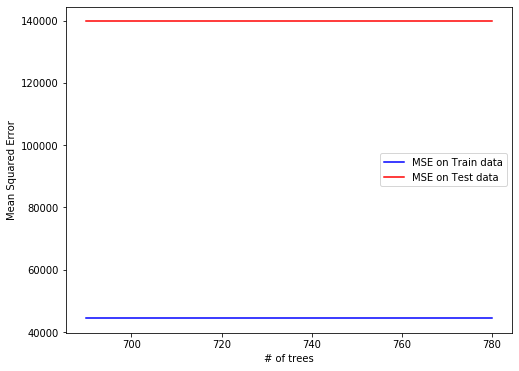

In [160]:
#plot how model performs with hyper parameter base estimators number increased

plt.figure(figsize=(8,6))  
plt.plot(trees, train_loss, color="blue", label="MSE on Train data")
plt.plot(trees, test_loss, color="red", label="MSE on Test data")
plt.xlabel("# of trees")
plt.ylabel("Mean Squared Error");
plt.legend()